In [1]:
import pandas as pd
import math
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt 
from scipy.optimize import lsq_linear

In [2]:
ss = np.loadtxt("sunspot.txt" )

In [3]:
ss.shape

(266, 13)

In [4]:
ss = np.delete(ss, 0, axis=1) # Delete years

In [5]:
ss.shape

(266, 12)

In [6]:
ss = np.reshape(ss, ss.shape[0] * ss.shape[1])

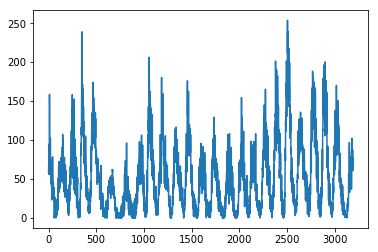

In [7]:
plt.plot(ss)
plt.show()

# Part A

In [64]:
TEST_SIZE = 12 * 5 # 12 months for 5 years
K = 21 # num o variables + 1 (bias)
TRAIN_SIZE = ss.shape[0] - TEST_SIZE


ss_train = ss[:TRAIN_SIZE]
ss_test = ss[TRAIN_SIZE:]

assert ss_test.shape[0] == TEST_SIZE, "Something went wrong with train/test split!"

In [65]:
Phi = np.array([])
for i in range(len(ss_train) - K + 1):
    Phi = np.append(Phi, 1)
    for j in range(K - 2, -1, -1):
        Phi = np.append(Phi, ss_train[i + j])

In [66]:
y_train = ss_train[K-1:]
y_test = ss_test[K-1:] # This is a very good question. Will we use training data to predict test data ? Data leakage
Phi = Phi.reshape(int(Phi.shape[0] / K), K)

assert y_train.shape[0] == Phi.shape[0], "Matrix lenght does not match for multiplication!" 

In [67]:
Phi

array([[   1. ,  103. ,   85.4, ...,   70. ,   62.6,   58. ],
       [   1. ,   91.2,  103. , ...,   55.7,   70. ,   62.6],
       [   1. ,   65.7,   91.2, ...,   85. ,   55.7,   70. ],
       ..., 
       [   1. ,    4.3,    0. , ...,    2.9,    9.3,    2.1],
       [   1. ,    4.8,    4.3, ...,    3.2,    2.9,    9.3],
       [   1. ,    4.1,    4.8, ...,    3.4,    3.2,    2.9]])

In [68]:
y_train

array([ 91.2,  65.7,  63.3, ...,   4.8,   4.1,  10.8])

In [69]:
lin_reg = np.dot(np.dot(linalg.inv(np.dot(Phi.transpose(),Phi)), Phi.transpose()), y_train) 
lin_reg

array([  3.40753279e+00,   5.42742346e-01,   9.36178958e-02,
         1.01431739e-01,   8.66568705e-02,   3.81649881e-02,
         6.33077050e-02,   8.09135445e-04,   2.78924119e-02,
         9.55003770e-02,   2.07517303e-02,   2.67433309e-02,
         5.34725403e-03,  -3.01700873e-02,   2.73501594e-02,
         1.32974778e-02,  -4.66236520e-02,  -5.55622599e-04,
        -7.26082436e-02,  -7.74804120e-03,  -5.20224438e-02])

In [70]:
################ End of training ################

In [71]:
################      RMSE_1    ################

In [72]:
# Whole matrix (train and test)
Phi_tot = np.array([])

for i in range(len(ss) - K):
    Phi_tot = np.append(Phi_tot, 1)
    for j in range(K - 2, -1, -1):
        Phi_tot = np.append(Phi_tot, ss[i + j])
Phi_tot = Phi_tot.reshape(int(Phi_tot.shape[0] / K), K)
Phi_tot.shape

(3171, 21)

In [73]:
math.sqrt(np.mean(np.power(np.dot(Phi_tot,lin_reg.T) - ss[K:], 2)))

17.75688453845377

In [74]:
################      RMSE_2    ################

In [75]:
Phi_tst = np.array([])

for i in range(len(ss_test) - K + 1 ):
    Phi_tst = np.append(Phi_tst, 1)
    for j in range(K - 2, -1, -1):
        Phi_tst = np.append(Phi_tst, ss_test[i + j])
Phi_tst = Phi_tst.reshape(int(Phi_tst.shape[0] / K), K)

In [76]:
Phi_tst.shape

(40, 21)

In [77]:
rmse = []
rmse.append(math.sqrt(np.mean(np.power(np.dot(Phi_tst,lin_reg.T) - y_test, 2))))
rmse.append(math.sqrt(np.mean(np.power(np.dot(Phi,lin_reg.T) - y_train, 2))))

rmse

[16.492937783757885, 15.370232088543426]

In [78]:
################ Predictor Chart ################

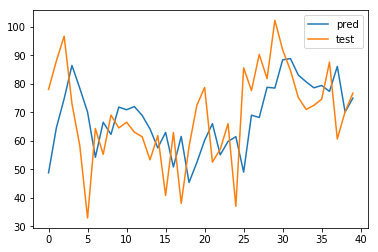

In [79]:
y_pred = np.dot(Phi_tst,lin_reg.T)
plt.plot(y_pred,label='pred')
plt.plot(y_test,label='test')
plt.legend()
plt.show()

# Part B

In [103]:
# Hyperparameters 
k = 5 # k-fold cross validation
Q = 21 # K + 1. Initial number of variables for Wrapper
lambdda = [i/10 for i in range(5) ] # Will choose lambdda instead of lambda for obvious reason
lambdda += ([i for i in range(1,6)])
lambdda

[0.0, 0.1, 0.2, 0.3, 0.4, 1, 2, 3, 4, 5]

In [ ]:
# Wrapper
for z in range()